In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('GDP_2020-2025.csv')

In [4]:
df.shape


(196, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [6]:
df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [7]:
df.head(5)

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [8]:
df.columns = [c.strip().lower().replace(' ',"_") for c in df.columns]

In [9]:
years = ['2020','2021','2022','2023','2024','2025']
df[years] = df[years].interpolate(method='linear', axis=1)
df.isnull().sum()

country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64

In [10]:
for year in range(2021, 2026):
    prev_year = str(year-1)
    curr_year = str(year)
    df[f'growth_{year}'] = round(((df[curr_year] - df[prev_year]) / df[prev_year].replace(0, np.nan)) * 100 , 2)
    
df.head()

,country,2020,2021,2022,2023,2024,2025,growth_2021,growth_2022,growth_2023,growth_2024,growth_2025
0,Afghanistan,20136.0,14278.0,14501.0,17248.0,17248.0,17248.0,-29.09,1.56,18.94,0.00,0.00
1,Albania,15271.0,18086.0,19185.0,23388.0,27259.0,28372.0,18.43,6.08,21.91,16.55,4.08
2,Algeria,164774.0,185850.0,225709.0,247789.0,264913.0,268885.0,12.79,21.45,9.78,6.91,1.50
3,Andorra,2885.0,3325.0,3376.0,3786.0,4038.0,4035.0,15.25,1.53,12.14,6.66,-0.07
4,Angola,66521.0,84375.0,142442.0,109764.0,115946.0,113343.0,26.84,68.82,-22.94,5.63,-2.25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      196 non-null    object 
 1   2020         196 non-null    float64
 2   2021         196 non-null    float64
 3   2022         196 non-null    float64
 4   2023         196 non-null    float64
 5   2024         196 non-null    float64
 6   2025         196 non-null    float64
 7   growth_2021  196 non-null    float64
 8   growth_2022  196 non-null    float64
 9   growth_2023  196 non-null    float64
 10  growth_2024  196 non-null    float64
 11  growth_2025  196 non-null    float64
dtypes: float64(11), object(1)
memory usage: 18.5+ KB


# Top 10 GDP countries in 2025

In [12]:
top_10_gdp = df[['country','2025']].sort_values(by='2025',ascending=False).head(10)
top_10_gdp

,country,2025
186,United States,30507217.0
36,China,19231705.0
64,Germany,4744804.0
77,India,4187017.0
85,Japan,4186431.0
185,United Kingdom,3839180.0
60,France,3211292.0
83,Italy,2422855.0
32,Canada,2225341.0
24,Brazil,2125958.0


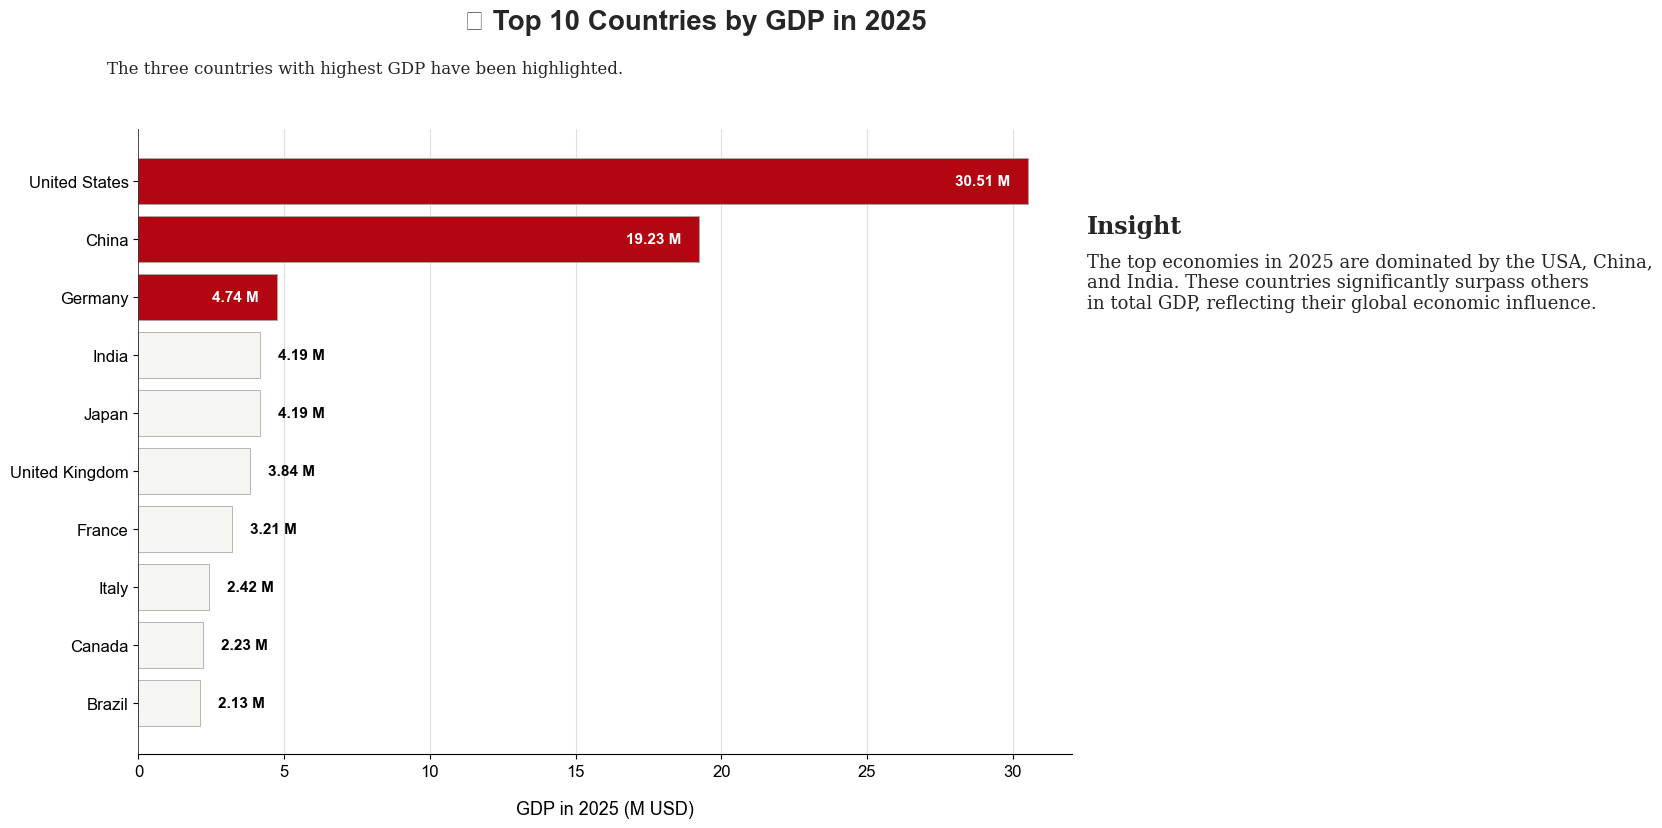

In [13]:
top_10_gdp = df[['country','2025']].sort_values(by='2025', ascending=False).head(10)

max_val = top_10_gdp['2025'].max()
if max_val > 1e12:
    scale = 1e12
    unit = "T"  
elif max_val > 1e9:
    scale = 1e9
    unit = "B"  
elif max_val > 1e6:
    scale = 1e6
    unit = "M"  
else:
    scale = 1
    unit = ""

data = top_10_gdp.set_index('country')['2025'] / scale

color_map = ['#f5f5f1']*10
color_map[0] = color_map[1] = color_map[2] = '#b20710'

fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")

bars = ax.barh(data.index[::-1], data[::-1], color=color_map[::-1], edgecolor='darkgray', linewidth=0.6)

for i, val in enumerate(data[::-1]):
    if val/data.max() > 0.15:
        ax.text(val - 0.02*data.max(), i, f"{val:,.2f} {unit}", va='center', ha='right', fontsize=11, fontweight='bold', color='white')
    else:
        ax.text(val + 0.02*data.max(), i, f"{val:,.2f} {unit}", va='center', ha='left', fontsize=11, fontweight='bold', color='black')

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

ax.set_xlabel(f"GDP in 2025 ({unit} USD)", fontsize=13, labelpad=15)

fig.suptitle("🌎 Top 10 Countries by GDP in 2025", fontsize=20, fontweight='bold', y=1.03)
fig.text(0.08, 0.95, 'The three countries with highest GDP have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.78, 0.75, "Insight", fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.78, 0.63, '''
The top economies in 2025 are dominated by the USA, China,
and India. These countries significantly surpass others
in total GDP, reflecting their global economic influence.
''', fontsize=13, fontweight='light', fontfamily='serif')

ax.grid(axis='x', linestyle='-', alpha=0.4)
ax.set_axisbelow(True)

plt.axvline(x=0, color='black', linewidth=1.3, alpha=0.7)

ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)

plt.tight_layout(rect=[0,0,0.78,0.95])  

plt.show()


# Identify fastest-growing countries 2020-2025

In [14]:
df['avg_growth'] = df[[f'growth_{y}' for y in range(2021,2026)]].mean(axis=1).round(2)
fastest_growing = df[['country','avg_growth']].sort_values(by='avg_growth',ascending=False).head(10)
slowest_growing = df[['country','avg_growth']].sort_values(by='avg_growth').head(10)
print("Fastest Growing Countries:")
print(fastest_growing)
print("\nSlowest Growing Countries:")
print(slowest_growing)

Fastest Growing Countries:
        country  avg_growth
71       Guyana       39.09
190   Venezuela       22.40
102       Macau       20.40
72        Haiti       19.95
93   Kyrgyzstan       19.35
63      Georgia       17.57
28      Burundi       17.54
7       Armenia       16.53
69       Guinea       16.41
106    Maldives       15.81

Slowest Growing Countries:
         country  avg_growth
127      Nigeria      -12.33
85         Japan       -3.47
159  South Sudan       -3.31
193        Yemen       -2.15
94          Laos       -2.09
0    Afghanistan       -1.72
165        Sudan       -1.33
51         Egypt       -1.25
169        Syria        0.00
119      Myanmar       -0.00


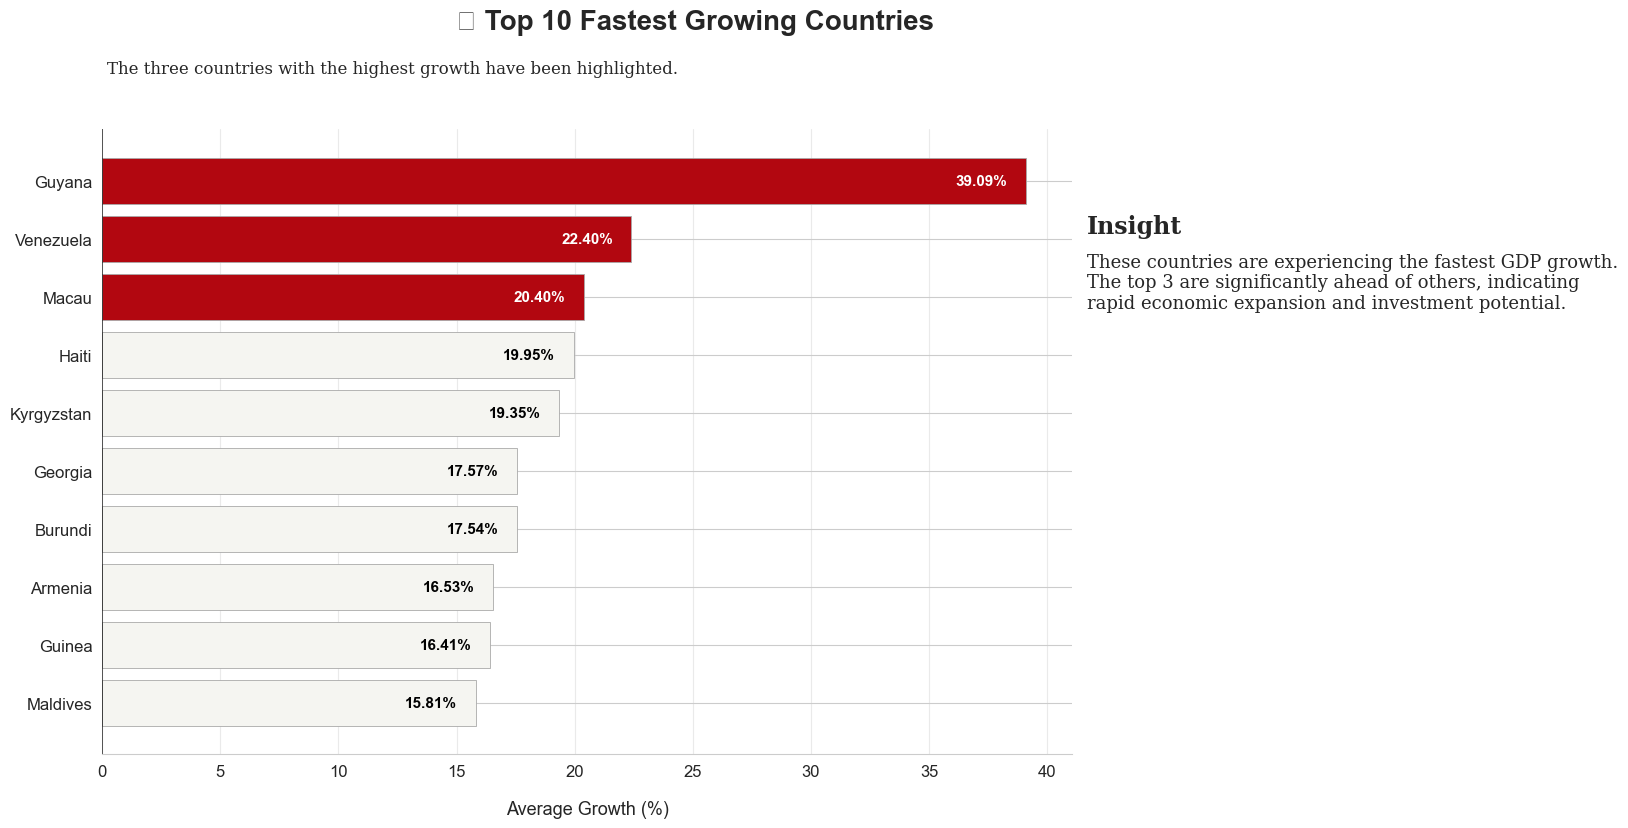

In [15]:
fastest_top = fastest_growing.sort_values(by='avg_growth', ascending=False).head(10)

data = fastest_top.set_index('country')['avg_growth']
color_map = ['#f5f5f1']*10
color_map[0] = color_map[1] = color_map[2] = '#b20710'  

fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")

bars = ax.barh(data.index[::-1], data[::-1], color=color_map[::-1], edgecolor='darkgray', linewidth=0.6)

for i, (val, bar_color) in enumerate(zip(data[::-1], color_map[::-1])):
    text_color = 'white' if bar_color in ['#b20710'] else 'black'
    if val/data.max() > 0.15:
        ax.text(val - 0.02*data.max(), i, f"{val:.2f}%", va='center', ha='right', fontsize=11, fontweight='bold', color=text_color)
    else:
        ax.text(val + 0.02*data.max(), i, f"{val:.2f}%", va='center', ha='left', fontsize=11, fontweight='bold', color=text_color)

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

ax.set_xlabel("Average Growth (%)", fontsize=13, labelpad=15)

fig.suptitle("🚀 Top 10 Fastest Growing Countries", fontsize=20, fontweight='bold', y=1.03)
fig.text(0.08, 0.95, 'The three countries with the highest growth have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.78, 0.75, "Insight", fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.78, 0.63, '''
These countries are experiencing the fastest GDP growth.
The top 3 are significantly ahead of others, indicating
rapid economic expansion and investment potential.
''', fontsize=13, fontweight='light', fontfamily='serif')

ax.grid(axis='x', linestyle='-', alpha=0.4)
ax.set_axisbelow(True)

plt.axvline(x=0, color='black', linewidth=1.3, alpha=0.7)

ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)

plt.tight_layout(rect=[0,0,0.78,0.95])

plt.show()


# CAGR (Compound Annual Growth Rate) for 2020–2025

In [16]:
df['CAGR_2020_2025'] = ((df['2025'] / df['2020']) ** (1/5) - 1) * 100

df['CAGR_2020_2025'] = df['CAGR_2020_2025'].round(2)

top_cagr = df[['country', 'CAGR_2020_2025']].sort_values(by='CAGR_2020_2025', ascending=False)
top_cagr.head(10)

,country,CAGR_2020_2025
71,Guyana,36.39
190,Venezuela,20.43
93,Kyrgyzstan,19.10
72,Haiti,18.25
63,Georgia,17.16
28,Burundi,16.90
69,Guinea,16.39
102,Macau,16.05
7,Armenia,15.74
106,Maldives,15.08


# Extract India data

In [17]:
years = ['2020','2021','2022','2023','2024','2025']
growth_cols = [f'growth_{y}' for y in range(2021,2026)]

india_gdp = df[df['country']=='India'][['2020','2021','2022','2023','2024','2025']].values.flatten()
india_growth = df.loc[df['country']=='India', growth_cols].values.flatten()

print("India GDP (2020-2025):", india_gdp)
print("India Growth Rates (2021-2025):", india_growth)


India GDP (2020-2025): [2674852. 3167271. 3346107. 3638490. 3909097. 4187017.]
India Growth Rates (2021-2025): [18.41  5.65  8.74  7.44  7.11]


# India GDP Trend 2020-2025

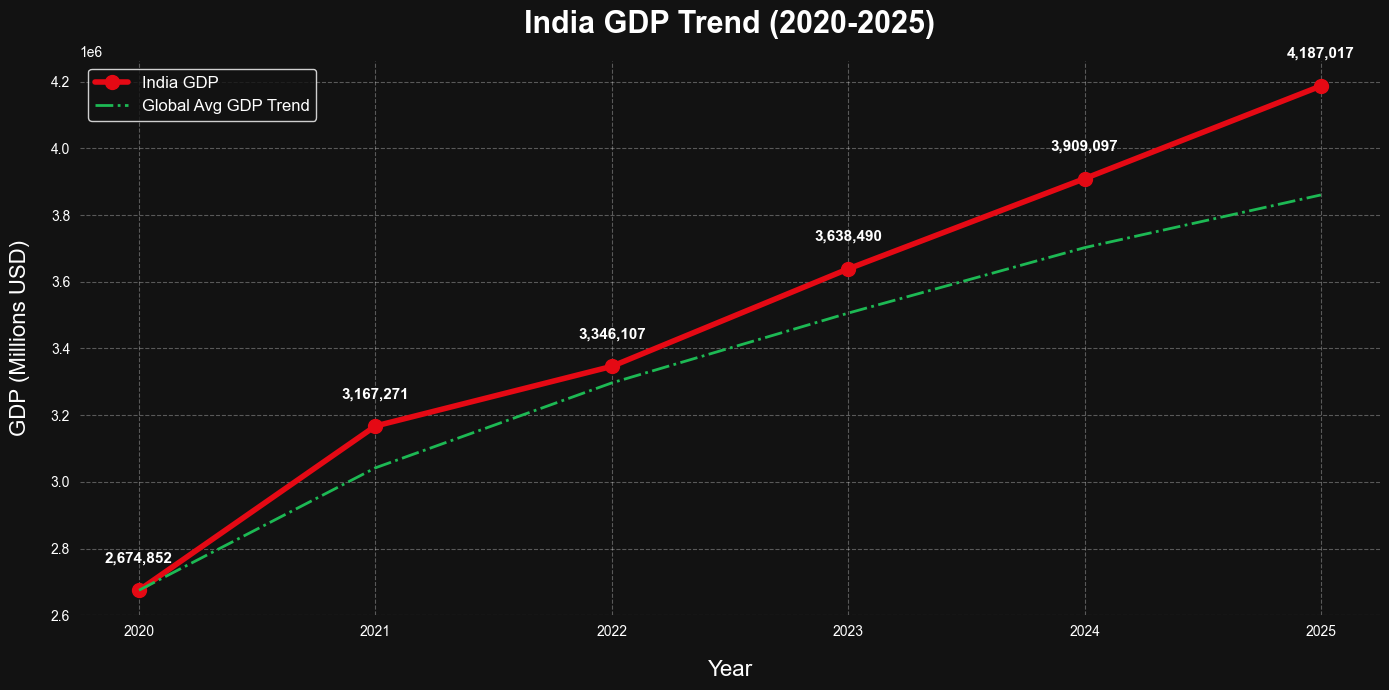

In [18]:
years = ['2020','2021','2022','2023','2024','2025']
india_values = df.loc[df['country']=='India', years].values.flatten()

growth_cols = [f'growth_{y}' for y in range(2021,2026)]
global_avg = df[growth_cols].mean(axis=0).values
global_avg_cumulative = [india_values[0]] + list(india_values[0] * np.cumprod(1 + global_avg/100))

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14,7))
fig.patch.set_facecolor('#121212')
ax.set_facecolor('#121212')

ax.plot(years, india_values, color='#E50914', linewidth=4, marker='o', markersize=10, label='India GDP')

ax.plot(years, global_avg_cumulative, color='#1DB954', linewidth=2, linestyle='-.', label='Global Avg GDP Trend')

for x, y in zip(years, india_values):
    ax.text(x, y + india_values.max()*0.02, f'{y:,.0f}', color='white', fontsize=11, fontweight='bold', ha='center')

ax.set_title("India GDP Trend (2020-2025)", fontsize=22, fontweight='bold', color='white', pad=20)
ax.set_xlabel("Year", fontsize=16, color='white', labelpad=15)
ax.set_ylabel("GDP (Millions USD)", fontsize=16, color='white', labelpad=15)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(True, linestyle='--', alpha=0.3, color='white')

ax.legend(facecolor='#121212', edgecolor='white', fontsize=12)

plt.tight_layout()
plt.show()


# Forecast GDP for India

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Forecast GDP for a single country (example: India)

model = ExponentialSmoothing(india_gdp, trend="add", seasonal=None, seasonal_periods=None)
fit_model = model.fit()
forecast = fit_model.forecast(3)  # next 3 years

print("Forecast GDP for India:", forecast)


Forecast GDP for India: [4490384.11718471 4776710.89025061 5063037.66331652]


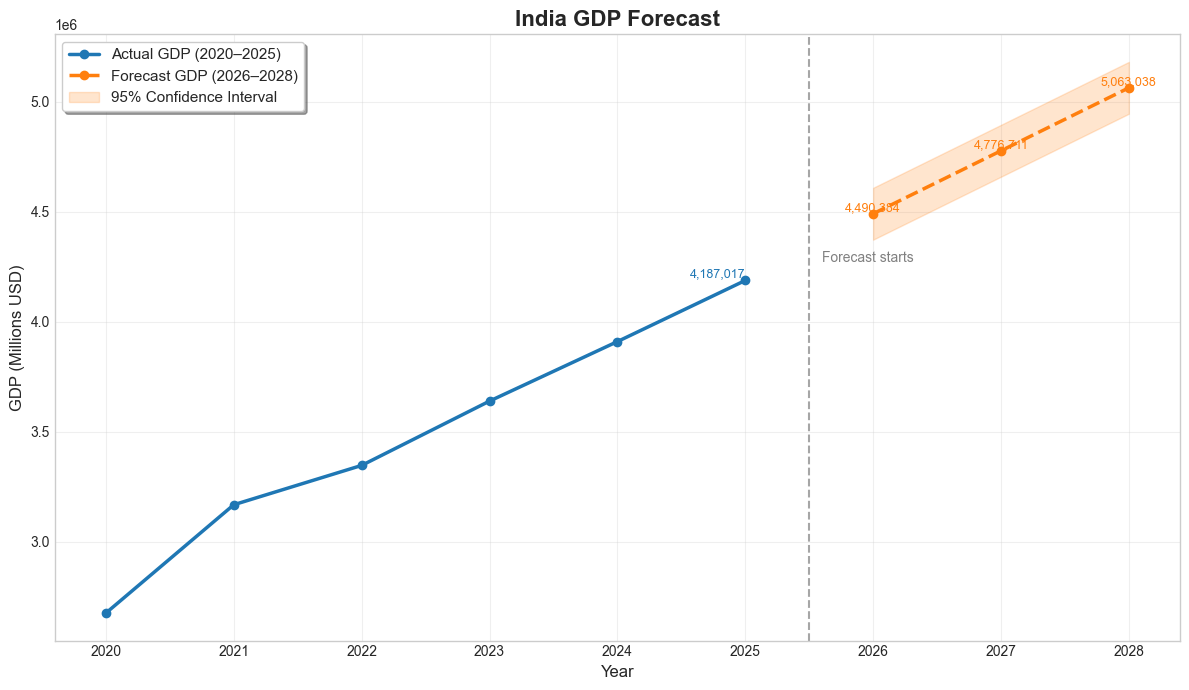

In [34]:
historical_years = np.arange(2020, 2026)

model = ExponentialSmoothing(india_gdp, trend="add", seasonal=None)
fit_model = model.fit()

forecast_steps = 3
forecast = fit_model.forecast(forecast_steps)
forecast_years = np.arange(2026, 2026 + forecast_steps)

resid_std = np.std(fit_model.resid)
ci95 = 1.96 * resid_std
lower = forecast - ci95
upper = forecast + ci95

plt.figure(figsize=(12,7))
plt.style.use("seaborn-v0_8-whitegrid")

plt.plot(historical_years, india_gdp, marker='o', linewidth=2.5, color="#1f77b4", label="Actual GDP (2020–2025)")

plt.plot(forecast_years, forecast, marker='o', linewidth=2.5, linestyle="--", color="#ff7f0e", label="Forecast GDP (2026–2028)")

plt.fill_between(forecast_years, lower, upper, color="#ff7f0e", alpha=0.2, label="95% Confidence Interval")

plt.axvline(x=2025.5, color="gray", linestyle="--", alpha=0.7)
plt.text(2025.6, max(india_gdp)*1.02, "Forecast starts", fontsize=10, color="gray")

plt.text(historical_years[-1], india_gdp[-1], f"{india_gdp[-1]:,.0f}", ha='right', va='bottom', fontsize=9, color="#1f77b4")
for x, y in zip(forecast_years, forecast):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9, color="#ff7f0e")

plt.title("India GDP Forecast", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP (Millions USD)", fontsize=12)
plt.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
plt.xticks(np.arange(2020, 2029, 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# India vs Major Asian Economies GDP

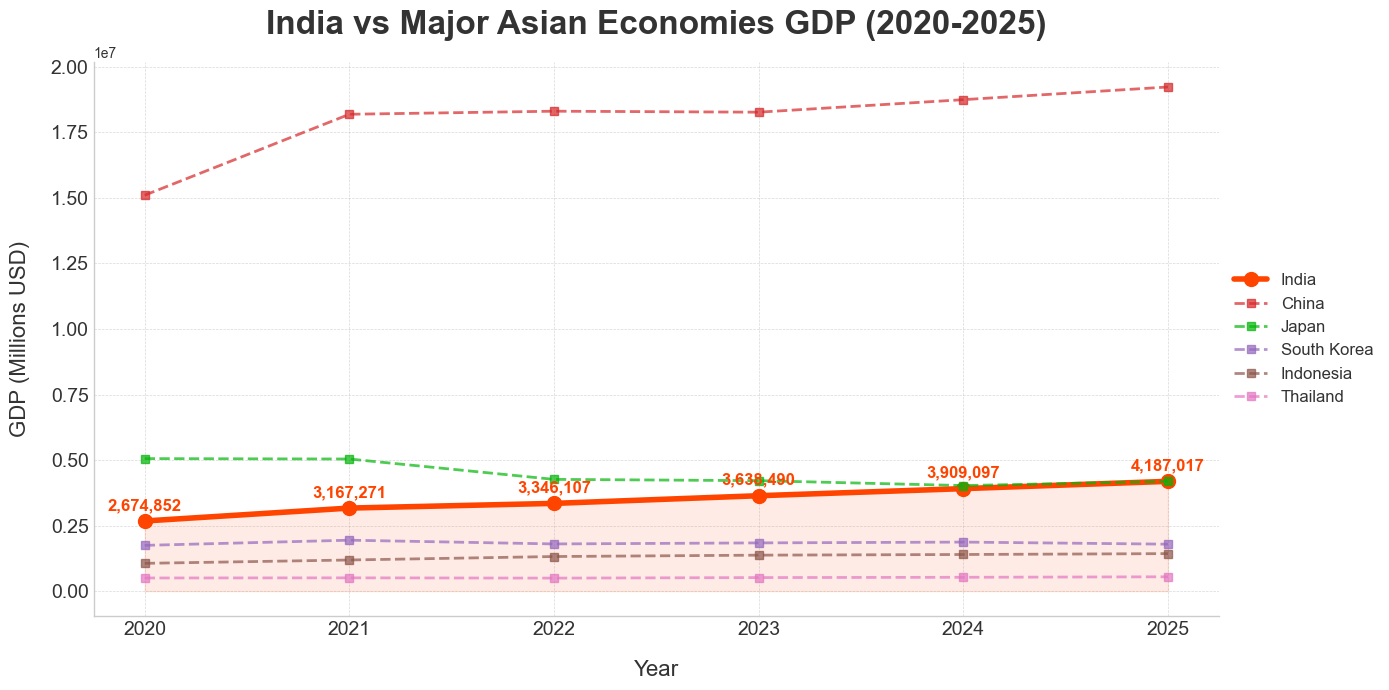

In [27]:
years = ['2020','2021','2022','2023','2024','2025']
asian_countries = ['India','China','Japan','South Korea','Indonesia','Thailand']

color_map = {
    'India':"#FF4400",
    'China':'#D62728',
    'Japan':"#03B509",
    'South Korea':'#9467BD',
    'Indonesia':'#8C564B',
    'Thailand':'#E377C2'
}

fig, ax = plt.subplots(figsize=(14,7))
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')

for country in asian_countries:
    values = df.loc[df['country']==country, years].values.flatten()
    if country == 'India':
        ax.plot(years, values, color=color_map[country], linewidth=4, marker='o', markersize=10, label=country)
        ax.fill_between(years, 0, values, color=color_map[country], alpha=0.1)
        for x, y in zip(years, values):
            ax.annotate(f'{y:,.0f}', xy=(x, y), xytext=(0,8),
                        textcoords='offset points', ha='center', fontsize=12, fontweight='bold', color="#FF4400")
    else:
        ax.plot(years, values, color=color_map[country], linewidth=2, linestyle='--', alpha=0.7, marker='s', markersize=6, label=country)

ax.set_title("India vs Major Asian Economies GDP (2020-2025)", fontsize=24, fontweight='bold', color='#333333', pad=20)
ax.set_xlabel("Year", fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel("GDP (Millions USD)", fontsize=16, color='#333333', labelpad=15)

ax.tick_params(axis='x', labelsize=14, colors='#333333')
ax.tick_params(axis='y', labelsize=14, colors='#333333')

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3, color='gray')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

legend = ax.legend(facecolor='#ffffff', edgecolor='black', fontsize=12,
                   loc='center left', bbox_to_anchor=(1, 0.5))
for text in legend.get_texts():
    text.set_color('#333333')

plt.tight_layout()
plt.show()


# Asia GDP Comparison (2020-2025) with CAGR Highlight

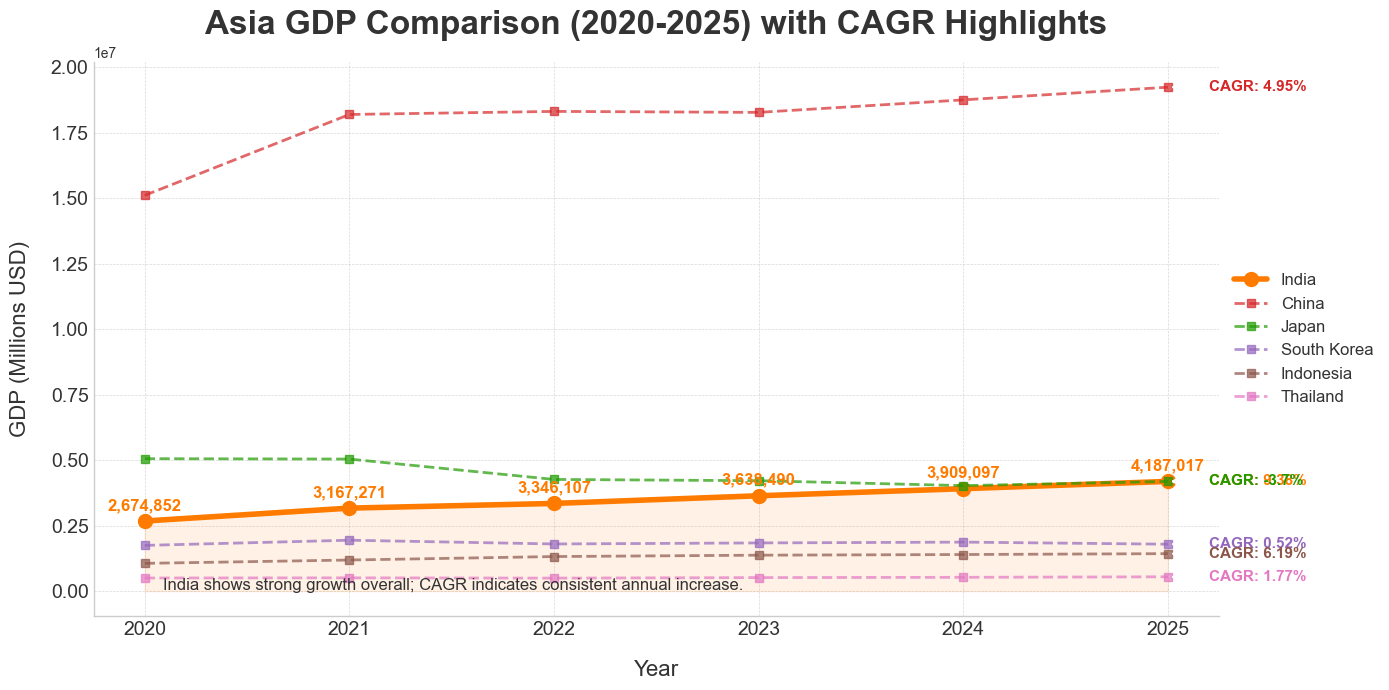

In [22]:
years = np.array([2020,2021,2022,2023,2024,2025])
asian_countries = ['India','China','Japan','South Korea','Indonesia','Thailand']

# Colors
color_map = {
    'India':"#FF7B00",
    'China':'#D62728',
    'Japan':"#1F9B00",
    'South Korea':'#9467BD',
    'Indonesia':'#8C564B',
    'Thailand':'#E377C2'
}

fig, ax = plt.subplots(figsize=(14,7))
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')

for country in asian_countries:
    values = df.loc[df['country']==country, [str(y) for y in years]].values.flatten()
    if country == 'India':
        ax.plot(years, values, color=color_map[country], linewidth=4, marker='o', markersize=10, label=country)
        ax.fill_between(years, 0, values, color=color_map[country], alpha=0.1)
        for x, y in zip(years, values):
            ax.annotate(f'{y:,.0f}', xy=(x, y), xytext=(0,8),
                        textcoords='offset points', ha='center', fontsize=12, fontweight='bold', color='#FF7B00')
    else:
        ax.plot(years, values, color=color_map[country], linewidth=2, linestyle='--', alpha=0.7, marker='s', markersize=6, label=country)

df['CAGR_2020_2025'] = ((df['2025'] / df['2020']) ** (1/5) - 1) * 100
df['CAGR_2020_2025'] = df['CAGR_2020_2025'].round(2)

cagr_x = 2025 + 0.2  
sorted_countries = df.loc[df['country'].isin(asian_countries)].sort_values(by='2025', ascending=False)['country'].tolist()

offsets = np.linspace(20000, -20000, len(sorted_countries))  

for i, country in enumerate(sorted_countries):
    last_gdp = df.loc[df['country']==country, '2025'].values[0]
    cagr_value = df.loc[df['country']==country, 'CAGR_2020_2025'].values[0]
    
    y_offset = 30000 if country == 'India' else offsets[i]
    
    ax.annotate(f'CAGR: {cagr_value}%',
                xy=(2025, last_gdp),
                xytext=(cagr_x, last_gdp + y_offset),
                arrowprops=dict(facecolor=color_map[country], arrowstyle='->', lw=1.5),
                fontsize=11, fontweight='bold', color=color_map[country],
                va='center')

ax.set_title("Asia GDP Comparison (2020-2025) with CAGR Highlights", fontsize=24, fontweight='bold', color='#333333', pad=20)
ax.set_xlabel("Year", fontsize=16, color='#333333', labelpad=15)
ax.set_ylabel("GDP (Millions USD)", fontsize=16, color='#333333', labelpad=15)

ax.tick_params(axis='x', labelsize=14, colors='#333333')
ax.tick_params(axis='y', labelsize=14, colors='#333333')

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3, color='gray')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

legend = ax.legend(facecolor='#ffffff', edgecolor='black', fontsize=12,
                   loc='center left', bbox_to_anchor=(1, 0.5))
for text in legend.get_texts():
    text.set_color('#333333')

fig.text(0.12, 0.15, "India shows strong growth overall; CAGR indicates consistent annual increase.", fontsize=12, color='#333333')

plt.tight_layout()
plt.show()
